In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Support Vector Machine Tutorial

### The Iris dataset(again)

For starters we will return to the iris-dataset. Check out the logistic regression tutorial for a more detailed look at the data.

In [10]:
iris: pd.DataFrame = sns.load_dataset("iris")
print("Unique species:", iris["species"].unique())
print(iris.head())
print(iris.info())

Unique species: ['setosa' 'versicolor' 'virginica']
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


All the data is numerical and there are no NaNs. We can proceed.

We will separate our features to classify by from true labels and split them into a training- and a test-set. 

In [11]:
features: pd.DataFrame = iris.drop('species', axis=1)
labels: pd.Series = iris.species

# Divide your sets in training and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test labels is {y_test.shape}")

Shape of train set is (120, 4)
Shape of test set is (30, 4)
Shape of train label is (120,)
Shape of test labels is (30,)


## Support Vector Classification:

Support vector machines try to separate the data by finding lines (more generally, hyperplanes) in the data space so that the data is separated as neatly as possible. 
The model only remembers the data points used to construct the planes - these are the *support vectors*.

SVMs can circumvent the problem of data that is not linearly separable by using the Kernel Trick. 
[In machine learning, a kernel refers to a method that allows us to apply linear classifiers to non-linear problems by mapping non-linear data into a higher-dimensional space without the need to visit or understand that higher-dimensional space.](https://programmathically.com/what-is-a-kernel-in-machine-learning/#:~:text=In%20machine%20learning%2C%20a%20kernel,understand%20that%20higher-dimensional%20space.)
Basically, we achieve that by calculating similarities between the data points and doing some transformation (called kernel function) on them.

The **linear** kernel is just the dot product of two feature vectors. It does not add nonlinearity, so it only works on linearly separable data.

The **Gaussian** or **RBF** kernel uses the Gaussian function to transform the data:
$$ K(u, v) = exp(-\gamma \sum_i (u_i - v_i)^2) $$
with $u$ and $v$ being feature vectors, and $\gamma$(also denoted as $\frac{1}{2\sigma^2}$) being the width of the gaussian function, which is a arbitrary hyperparameter. [Intuitively, the gamma parameter defines how far the influence of a single training example reaches.](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) If it is too large, the Gaussians are too tight and the model overfits on the training data. If too small, all data points overlap too much and the model can't learn properly.

There are also other kernel functions, e.g. **polynomial** or **sigmoidal** kernels.
Check out the documentation on SVMs in scikit-learn and feel free to experiment!

We'll stick to a linear kernel for now.

In [12]:
model: SVC = SVC(kernel='linear')

We fit the model, calculate the accuracy and plot the confusion matrix again:

The accuracy on the test set is  0.97


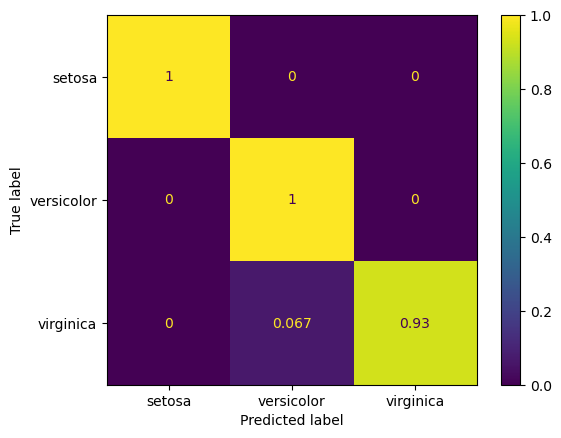

In [13]:
model.fit(X_train, y_train)
print(f"The accuracy on the test set is {metrics.accuracy_score(y_test, model.predict(X_test)): .2f}")
cm: np.ndarray = confusion_matrix(y_test, model.predict(X_test), normalize='true')
disp: ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris["species"].unique())
disp.plot()
plt.show()

Finally here is a way to visualise the decision boundary and you also get to play around with the different kernel methods and margin-hardness.

See how the boundary shifts when you change parameters like the margin-hardness ```C```, width of the gaussian ```gamma``` and degree of the polynomial kernel ```degree```.

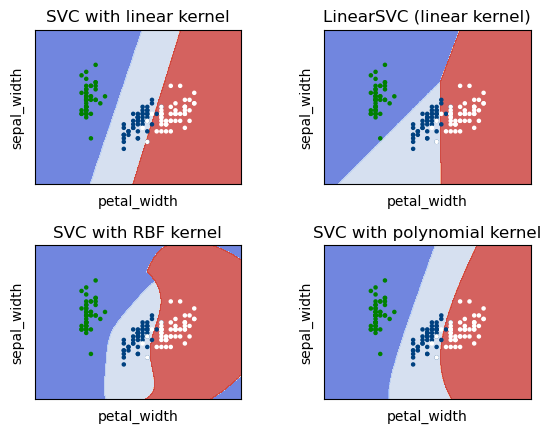

In [14]:
feature_duo: list = ["petal_width", "sepal_width"]
X: pd.DataFrame = iris[feature_duo]  # we only take two features to be able to plot in 2D.
y: pd.Series = iris["species"].map({"setosa": 0, "versicolor": 1, "virginica": 2})

C: int = 5  # margin hardness C
svc: SVC = SVC(kernel='linear', C=C).fit(X.values, y)
rbf_svc: SVC = SVC(kernel='rbf', gamma=1, C=C).fit(X.values, y) # gaussian width gamma
poly_svc: SVC = SVC(kernel='poly', degree=3, C=C).fit(X.values, y) # polynomial degree degree
lin_svc: SVC = LinearSVC(C=C, max_iter=10000).fit(X.values, y)

x_min, y_min = X.min() - 1
x_max, y_max = X.max() + 1
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles: list = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']

for i, model in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1],s=5, c=y, cmap="ocean")
    plt.xlabel(feature_duo[0])
    plt.ylabel(feature_duo[1])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()